# WeatherPy

In [193]:
# Dependencies and Setup
from config import api_key
import openweathermapy.core as owm
import matplotlib.pyplot as plt
from citipy import citipy
import pandas as pd
import numpy as np
import requests
import time

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [194]:
#Create columns, values to later overwrite/filter by later
df = pd.DataFrame()
col = ["Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max", "Temp", "Wind", "Speed"]
df["City"] = cities
df = df.reindex(columns = df.columns.tolist() + col, fill_value="-100")
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max,Temp,Wind,Speed
0,vengerovo,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
1,taolanaro,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
2,alofi,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
3,batsfjord,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
4,namibe,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [195]:
record = 0
url = f"{base_url}appid={api_keys}&units={units}&q="
for index, row in df.iterrows():
    city = row['City']
    record += 1
    current_weather = requests.get(url + city).json()
    print(f"Processing Record {record} of Set 1 | {city} ")
    try:
        df.loc[index, "City"] = current_weather["name"]
        df.loc[index, "Cloudiness"] = current_weather["clouds"]["all"]
        df.loc[index, "Country"] = current_weather["sys"]["country"]
        df.loc[index, "Date"] = current_weather["dt"]
        df.loc[index, "Humidity"] = current_weather["main"]["humidity"]
        df.loc[index, "Lat"] = current_weather["coord"]["lat"]
        df.loc[index, "Lng"] = current_weather["coord"]["lon"]
        df.loc[index, "Max"] = current_weather["main"]["temp_max"]
        df.loc[index, "Temp"] = current_weather["main"]["temp"]
        df.loc[index, "Wind"] = current_weather["wind"]["deg"]
        df.loc[index, "Speed"] = current_weather["wind"]["speed"]
    except (KeyError, IndexError):
        print("City not found.  Skipping...")

Processing Record 1 of Set 1 | vengerovo 
Processing Record 2 of Set 1 | taolanaro 
City not found.  Skipping...
Processing Record 3 of Set 1 | alofi 
Processing Record 4 of Set 1 | batsfjord 
Processing Record 5 of Set 1 | namibe 
Processing Record 6 of Set 1 | pierre 
Processing Record 7 of Set 1 | fort nelson 
Processing Record 8 of Set 1 | amderma 
City not found.  Skipping...
Processing Record 9 of Set 1 | bambous virieux 
Processing Record 10 of Set 1 | igra 
Processing Record 11 of Set 1 | mahebourg 
Processing Record 12 of Set 1 | la ronge 
Processing Record 13 of Set 1 | kodiak 
Processing Record 14 of Set 1 | busselton 
Processing Record 15 of Set 1 | ushuaia 
Processing Record 16 of Set 1 | savannakhet 
Processing Record 17 of Set 1 | georgetown 
Processing Record 18 of Set 1 | nikolskoye 
Processing Record 19 of Set 1 | gravelbourg 
Processing Record 20 of Set 1 | castro 
Processing Record 21 of Set 1 | masunga 
Processing Record 22 of Set 1 | cayenne 
Processing Record 23 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [196]:
#Cleaning data
df = df.astype({"Cloudiness": int, "Date": int, "Humidity": int, "Lat": int, "Lng": int, "Max": int, "Temp": int, "Wind": int, "Speed": int})
df = df.drop(df[df.Speed < -10].index)
df.reset_index(drop=True, inplace=True)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max,Temp,Wind,Speed
0,Vengerovo,48,RU,1549676120,33,55,76,-22,-22,137,13
1,Alofi,92,NU,1549676120,97,-19,-169,83,83,35,28
2,Batsfjord,0,NO,1549676120,100,70,29,20,20,245,11
3,Namibe,0,AO,1549676120,100,-15,12,74,74,177,12
4,Pierre,1,US,1549673580,71,44,-100,0,0,90,16


In [197]:
# Save data to csv
df.to_csv("WeatherPy.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

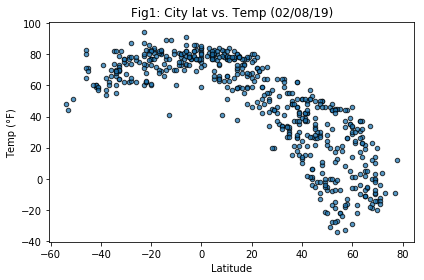

In [207]:
fig1 = df.plot.scatter(x="Lat", y="Max", marker="o", facecolors ="blue", edgecolors = "black", alpha=0.75)
fig1.set_title("Fig1: City lat vs. Temp (02/08/19)")
fig1.set_xlabel("Latitude")
fig1.set_ylabel("Temp (°F)")
plt.tight_layout()
plt.savefig("fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

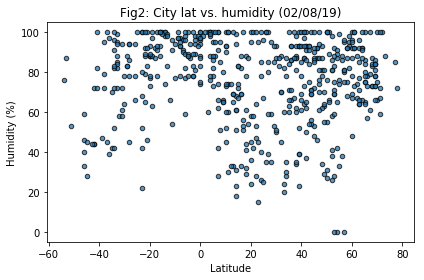

In [204]:
fig2 = df.plot.scatter(x="Lat", y="Humidity", marker="o", facecolors ="blue", edgecolors = "black", alpha=0.75)
fig2.set_title("Fig2: City lat vs. humidity (02/08/19)")
fig2.set_xlabel("Latitude")
fig2.set_ylabel("Humidity (%)")
plt.tight_layout()
plt.savefig("fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

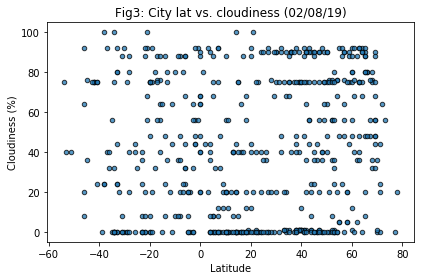

In [205]:
fig3 = df.plot.scatter(x="Lat", y="Cloudiness", marker="o", facecolors ="blue", edgecolors = "black", alpha=0.75)
fig3.set_title("Fig3: City lat vs. cloudiness (02/08/19)")
fig3.set_xlabel("Latitude")
fig3.set_ylabel("Cloudiness (%)")
plt.tight_layout()
plt.savefig("fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

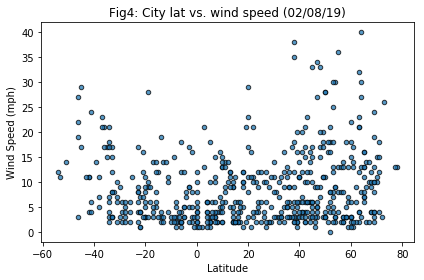

In [206]:
fig4 = df.plot.scatter(x="Lat", y="Speed", marker="o", facecolors ="blue", edgecolors = "black", alpha=0.75)
fig4.set_title("Fig4: City lat vs. wind speed (02/08/19)")
fig4.set_xlabel("Latitude")
fig4.set_ylabel("Wind Speed (mph)")
plt.tight_layout()
plt.savefig("fig4.png")
plt.show()

In [223]:
#### Analysis
# As seen in Fig1, the temperature for a majority of the cities is warmer as they get closer to the equator at 0° Latitude. Additonally, the northern hemisphere is currently experiencing extremely cold winter weather conditions.  
# There is a notable concentration of cities at or above 80% humidity in Fig2.  Also, there is a much larger variation in humidity levels currently in the northern hemisphere than in the sourthern hemisphere.
# In Fig3, there does not appear to be a correlation between latitude and cloudiness.  However, the northern hemisphere is contains a significantly higher amount of cities experiencing 75% cloudiness or more.
# There seems to be a slight correlation in increasing wind speed as cities move away from the equator (Fig4).